# Task 6.4: Supervised Machine Learning

## 1. Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
#create file path and load data
path = r'C:\Users\Marvin\Task 6'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.pkl'))
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [5]:
# Replace 'United States' with 'United States of America'
df['Country'] = df['Country'].replace('United States', 'United States of America')

## 2. Creating scatterplot

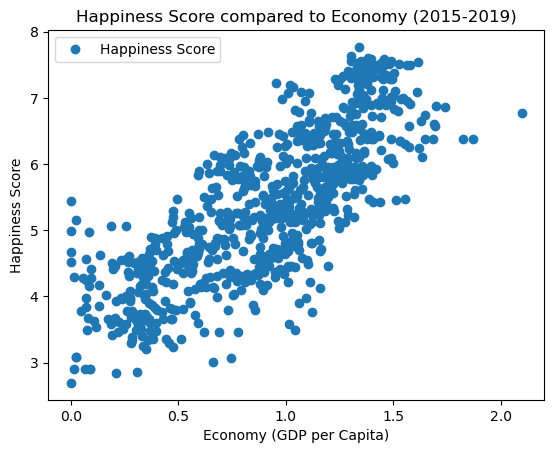

In [17]:
# Create a scatterplot comparing happiness score and economy

df.plot(x = 'Economy (GDP per Capita)', y= 'Happiness Score' ,style='o') 
plt.title('Happiness Score compared to Economy (2015-2019)')  
plt.xlabel('Economy (GDP per Capita)')  
plt.ylabel('Happiness Score')
plt.show()

## 3. Prepare variables for regression

In [29]:
#reshape variables for regression 
X = df['Economy (GDP per Capita)'].values.reshape(-1, 1)
y = df['Happiness Score'].values.reshape(-1, 1)

In [30]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
#create linear regression object
regression = LinearRegression()

In [33]:
#fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [34]:
y_predicted = regression.predict(X_test)

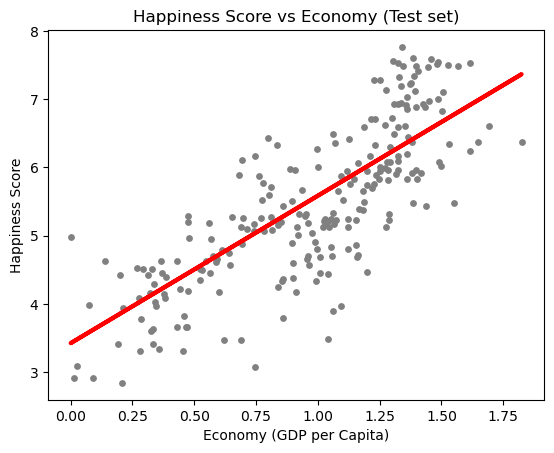

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy (Test set)')
plot_test.xlabel('Economy (GDP per Capita)')
plot_test.ylabel('Happiness Score')
plot_test.show()

### Hypothesis: The higher the Economy Score the higher the Happiness Rate

In [36]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [37]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


### The MSE is quite low and R2 score is medium high, which indicates that it slightly fits

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


### The predicted values are very near of the actual values in many cases. This model is good at predicting the happiness score based on the economy score.

## 4. Export dataset

In [39]:
df.shape

(782, 11)

In [40]:
#export file
df.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'merged_data_updated.pkl'))